In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
# local
import wrangle as w
import explore as e
import modeling as m

In [2]:
# 52,441 rows to 51,046, drop less than 3%

In [3]:
df = w.get_zillow()
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,17173851,787,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,64712.0,2016.0,17519.0,781.00,NaN,NaN,6.111004e+13,389.0,0.088469,2017-01-03
1,10821119,1702,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,381638.0,2016.0,274127.0,4692.27,NaN,NaN,6.037131e+13,402.0,0.025629,2017-01-03
2,11007640,2412,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,305307.0,2016.0,160505.0,3887.80,NaN,NaN,6.037106e+13,2699.0,0.020360,2017-01-12
3,11457850,3770,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,93146.0,2016.0,54446.0,1246.18,NaN,NaN,6.037276e+13,2229.0,0.054233,2017-01-11
4,12591550,8197,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,482242.0,2016.0,385591.0,6098.62,NaN,NaN,6.037544e+13,3038.0,-0.016170,2017-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12885754,2976765,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,200214.0,2016.0,106817.0,2629.33,NaN,NaN,6.037403e+13,42657.0,0.515289,2017-06-01
52437,13869000,2977815,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,215695.0,2016.0,80652.0,2607.04,NaN,NaN,6.059002e+13,32297.0,0.009512,2017-05-02
52438,13890509,2977914,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.0,...,1389962.0,2016.0,1118935.0,14935.72,NaN,NaN,6.059063e+13,28537.0,-0.031048,2017-04-21
52439,17246810,2980979,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,403678.0,2016.0,201839.0,4880.90,NaN,NaN,6.111008e+13,8396.0,-0.031665,2017-02-07


In [4]:
df = w.prep4ex_zillow(df)
df

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,pools,poolsizesum,area,stories,unitcnt,county,latitude,longitude,trx_month,trx_day,prop_value
0,1952,2.0,4,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1848,1.0,0.0,Ventura,34153345.0,-119194015.0,1,3,64712
1,1952,2.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1430,0.0,1.0,LA,34217763.0,-118504217.0,1,3,381638
2,1976,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1572,0.0,1.0,LA,34326995.0,-118426172.0,1,12,305307
3,1941,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1412,0.0,1.0,LA,33962085.0,-118393253.0,1,11,93146
4,1959,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1352,0.0,1.0,LA,33833583.0,-118295434.0,1,13,482242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,1948,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1021,0.0,1.0,LA,34041973.0,-117761243.0,6,1,200214
52437,1976,2.0,4,7.0,0.0,2.0,454.0,0.0,0.0,0.0,1554,1.0,0.0,Orange,33868442.0,-117974576.0,5,2,215695
52438,2001,4.0,3,5.0,0.0,3.0,864.0,0.0,0.0,0.0,2880,1.0,0.0,Orange,33624412.0,-117921232.0,4,21,1389962
52439,1986,2.5,3,5.0,1.0,2.0,456.0,0.0,0.0,0.0,1376,2.0,0.0,Ventura,34253728.0,-118732673.0,2,7,403678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51046 entries, 0 to 52440
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             51046 non-null  int64  
 1   baths            51046 non-null  float64
 2   beds             51046 non-null  int64  
 3   roomcnt          51046 non-null  float64
 4   fireplacecnt     51046 non-null  float64
 5   garagecarcnt     51046 non-null  float64
 6   garagetotalsqft  51046 non-null  float64
 7   hashottuborspa   51046 non-null  float64
 8   pools            51046 non-null  float64
 9   poolsizesum      51046 non-null  float64
 10  area             51046 non-null  int64  
 11  stories          51046 non-null  float64
 12  unitcnt          51046 non-null  float64
 13  county           51046 non-null  object 
 14  latitude         51046 non-null  float64
 15  longitude        51046 non-null  float64
 16  trx_month        51046 non-null  int64  
 17  trx_day     

## Full Explore Time

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,51046.0,1.963122e+03,22.890992,1878.0,1.950000e+03,1960.0,1.978000e+03,2016.0
baths,51046.0,2.244476e+00,0.916232,0.0,2.000000e+00,2.0,3.000000e+00,10.0
beds,51046.0,3.279415e+00,0.912294,0.0,3.000000e+00,3.0,4.000000e+00,11.0
roomcnt,51046.0,1.906594e+00,3.143664,0.0,0.000000e+00,0.0,5.000000e+00,14.0
fireplacecnt,51046.0,1.664773e-01,0.450406,0.0,0.000000e+00,0.0,0.000000e+00,4.0
garagecarcnt,51046.0,6.655174e-01,0.963036,0.0,0.000000e+00,0.0,2.000000e+00,14.0
garagetotalsqft,51046.0,1.689999e+02,247.668993,0.0,0.000000e+00,0.0,4.300000e+02,4251.0
hashottuborspa,51046.0,2.701485e-02,0.162128,0.0,0.000000e+00,0.0,0.000000e+00,1.0
pools,51046.0,2.030913e-01,0.402304,0.0,0.000000e+00,0.0,0.000000e+00,1.0
poolsizesum,51046.0,8.206696e+00,66.971979,0.0,0.000000e+00,0.0,0.000000e+00,1500.0


In [7]:
train,val,test = w.split_data(df)
train

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,pools,poolsizesum,area,stories,unitcnt,county,latitude,longitude,trx_month,trx_day,prop_value
9568,1944,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001,0.0,1.0,LA,33800512.0,-118213302.0,7,12,265150
18363,2014,2.0,3,6.0,0.0,2.0,400.0,0.0,0.0,0.0,1580,1.0,0.0,Orange,33634652.0,-117898149.0,7,11,1275356
2877,1963,2.0,3,5.0,0.0,2.0,408.0,0.0,0.0,0.0,1128,1.0,0.0,Orange,33753941.0,-118032920.0,3,8,498221
30380,1954,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1188,0.0,1.0,LA,34213276.0,-118521205.0,5,23,105337
2657,1942,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1470,0.0,1.0,LA,33843316.0,-118173744.0,1,11,399808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1973,2.5,3,5.0,0.0,2.0,400.0,0.0,0.0,0.0,1410,2.0,0.0,Orange,33890714.0,-117791168.0,1,30,452000
26843,1968,2.0,3,6.0,1.0,2.0,480.0,0.0,1.0,0.0,1360,1.0,0.0,Orange,33617605.0,-117671395.0,3,6,583768
26089,1990,2.5,4,0.0,0.0,2.0,441.0,0.0,0.0,0.0,1725,0.0,0.0,Orange,33582894.0,-117712323.0,5,5,294332
9979,1988,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432,0.0,1.0,LA,34624529.0,-117848607.0,3,30,53049


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,30627.0,1.962974e+03,22.934752,1878.0,1950.0,1960.0,1978.0,2016.0
baths,30627.0,2.240899e+00,0.919029,0.0,2.0,2.0,3.0,10.0
beds,30627.0,3.277957e+00,0.912389,0.0,3.0,3.0,4.0,11.0
roomcnt,30627.0,1.900317e+00,3.135237,0.0,0.0,0.0,5.0,14.0
fireplacecnt,30627.0,1.663565e-01,0.449479,0.0,0.0,0.0,0.0,4.0
garagecarcnt,30627.0,6.609201e-01,0.960387,0.0,0.0,0.0,2.0,14.0
garagetotalsqft,30627.0,1.679318e+02,247.083985,0.0,0.0,0.0,430.0,4251.0
hashottuborspa,30627.0,2.713292e-02,0.162473,0.0,0.0,0.0,0.0,1.0
pools,30627.0,2.028276e-01,0.402112,0.0,0.0,0.0,0.0,1.0
poolsizesum,30627.0,8.145819e+00,66.407434,0.0,0.0,0.0,0.0,1120.0


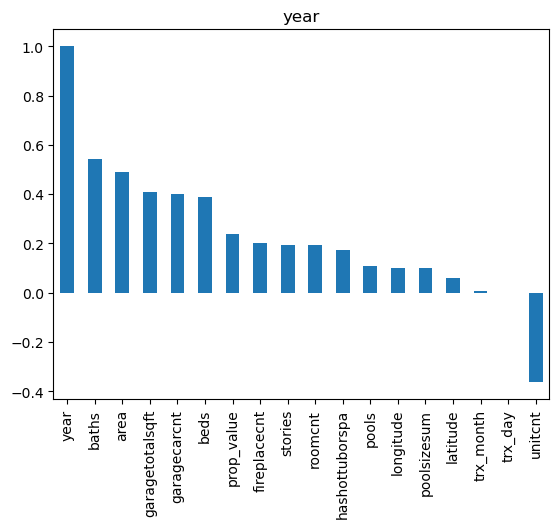

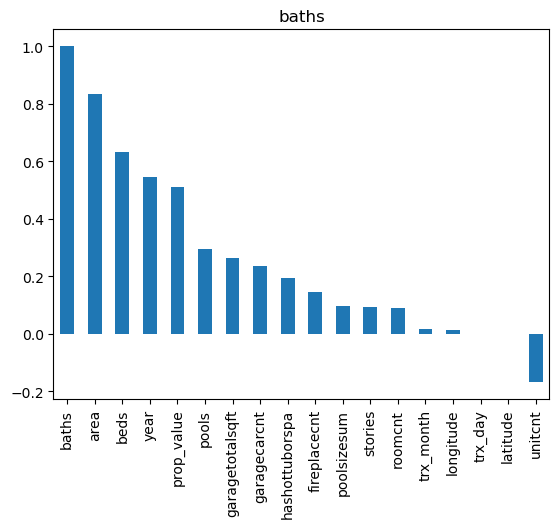

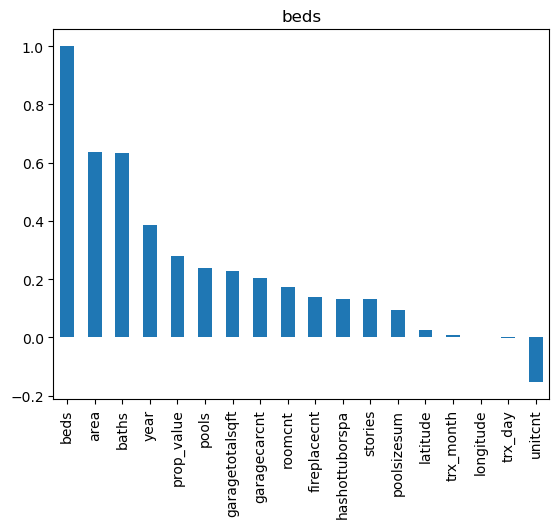

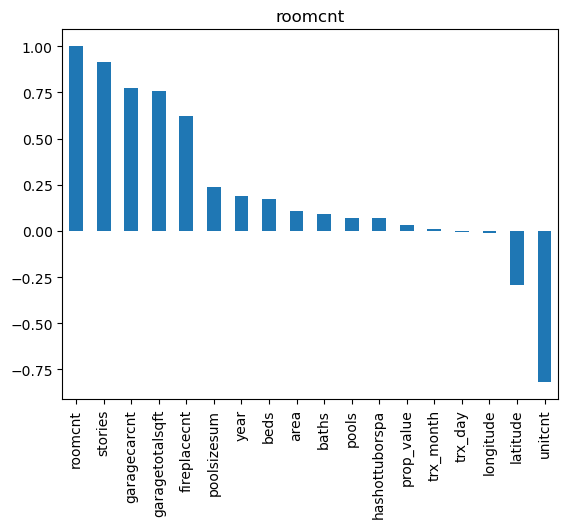

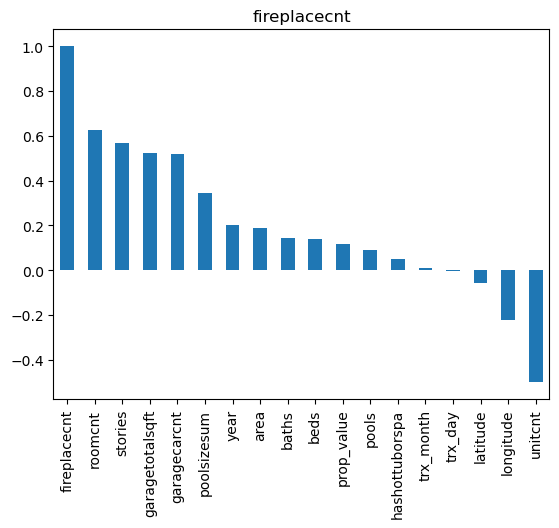

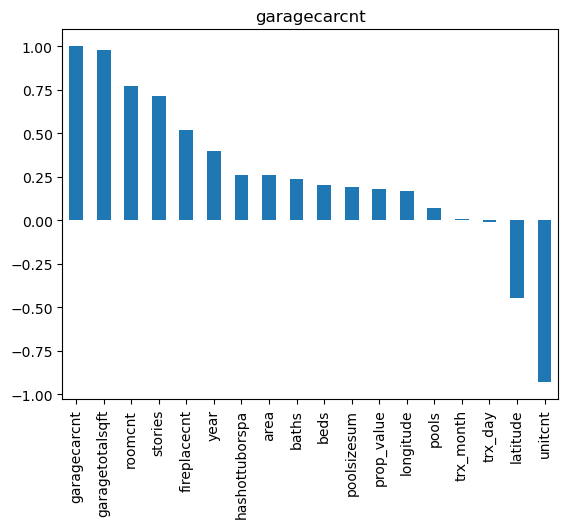

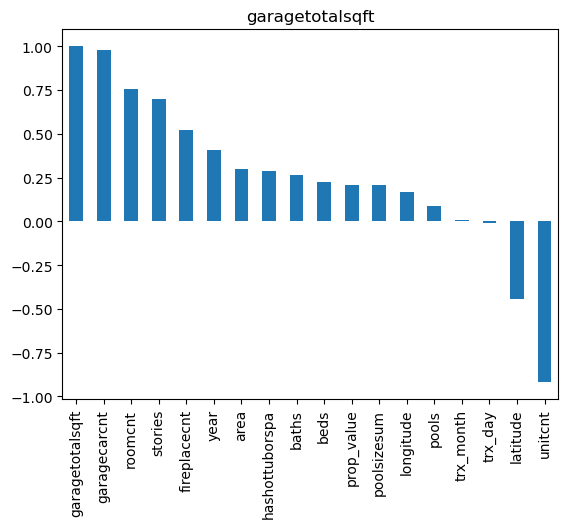

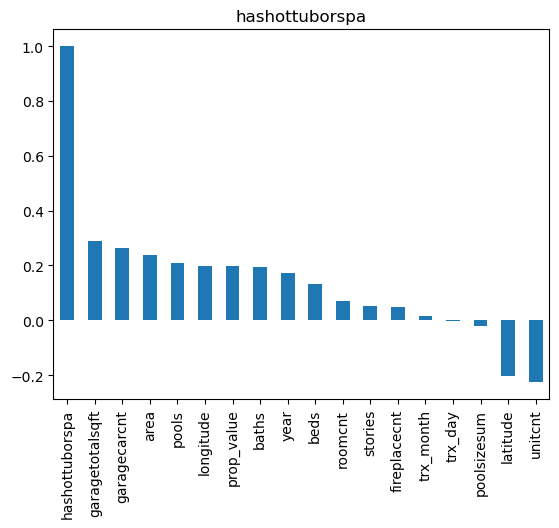

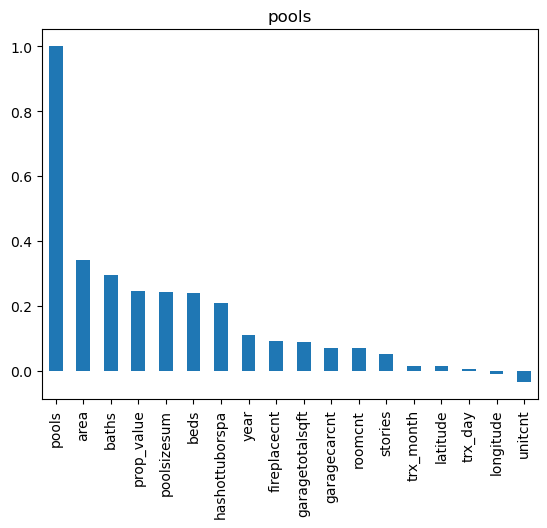

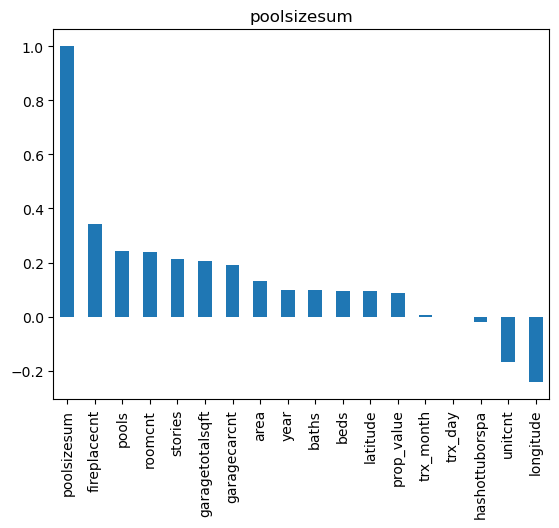

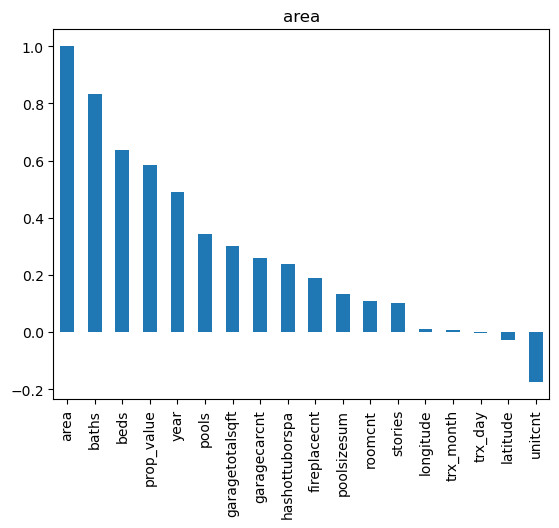

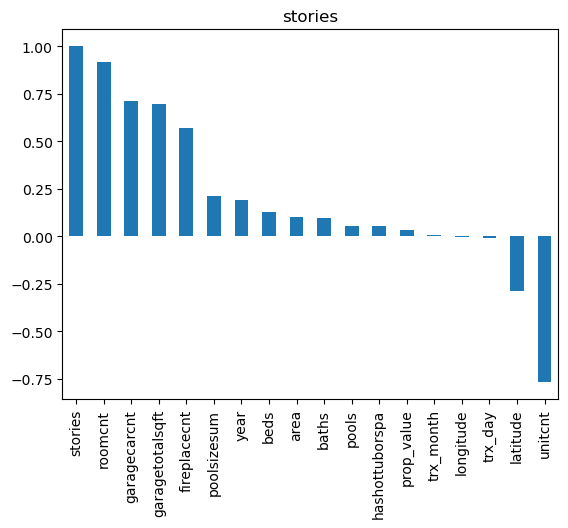

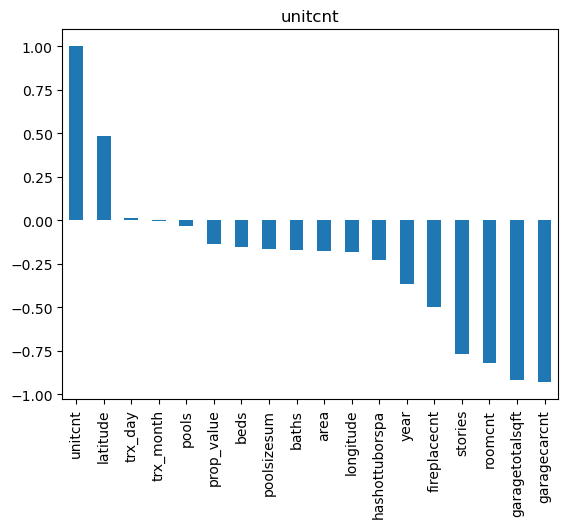

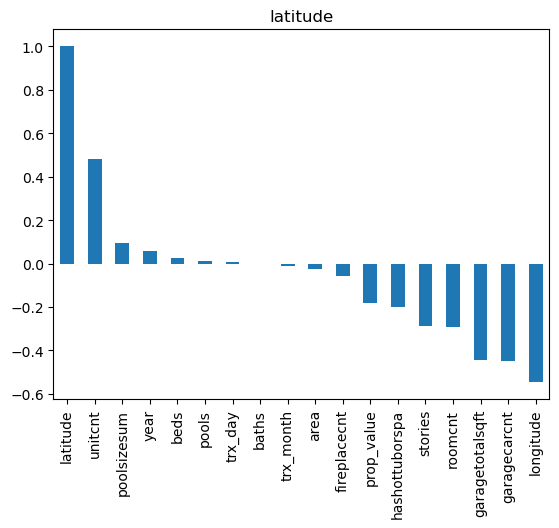

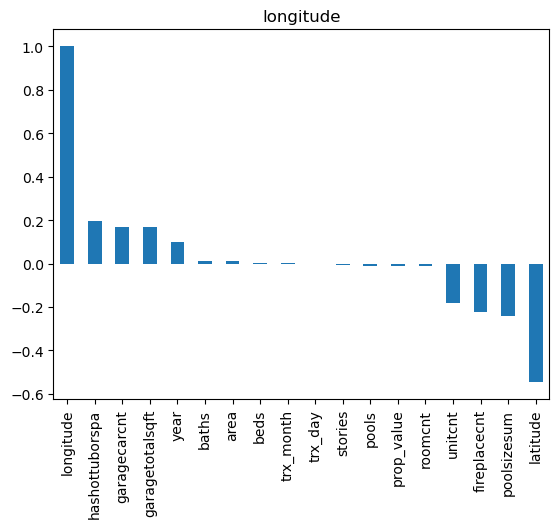

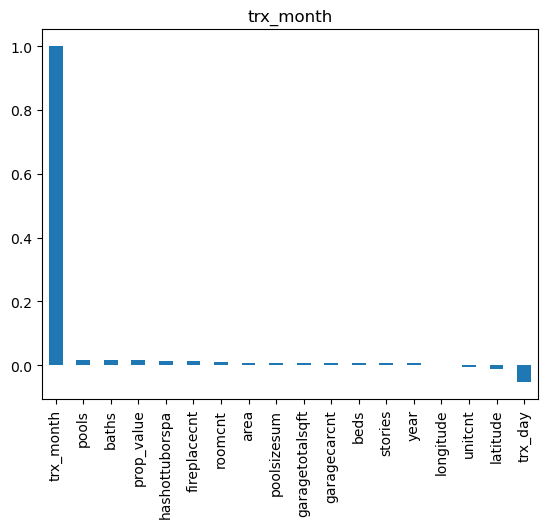

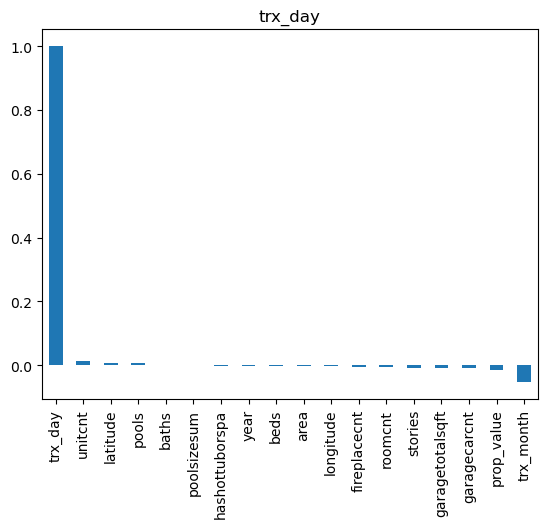

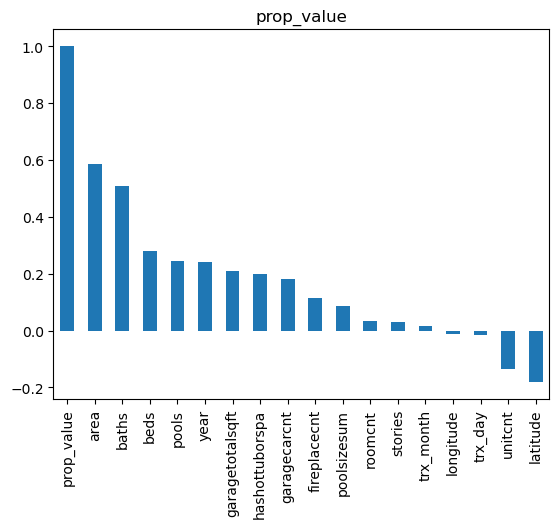

In [9]:
cols = train.drop(columns=['county']).columns.to_list()
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.title(col)
    plt.show()

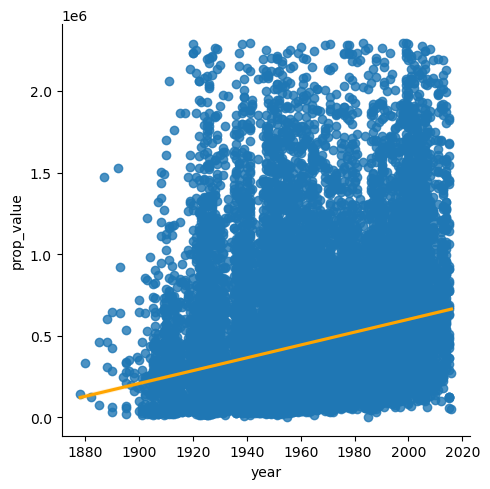

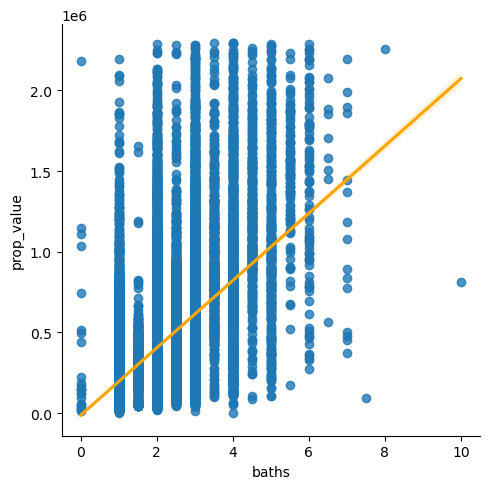

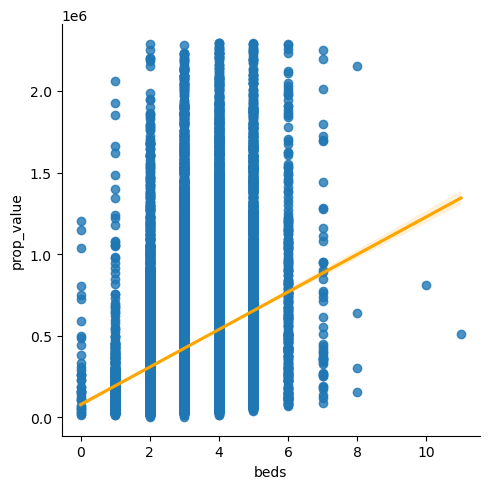

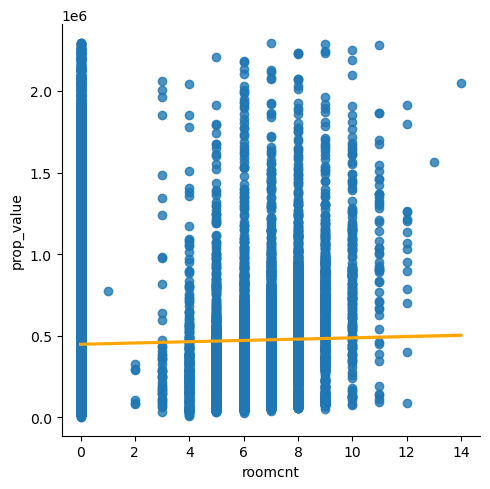

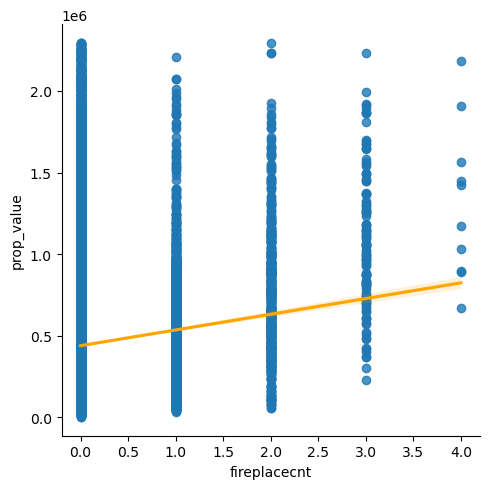

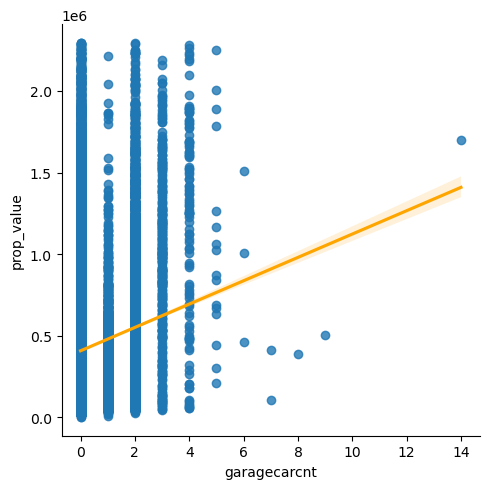

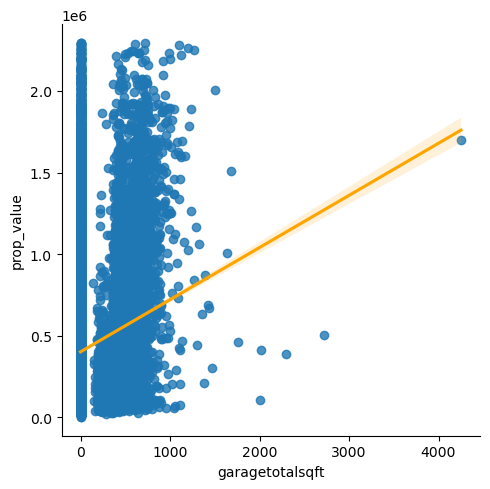

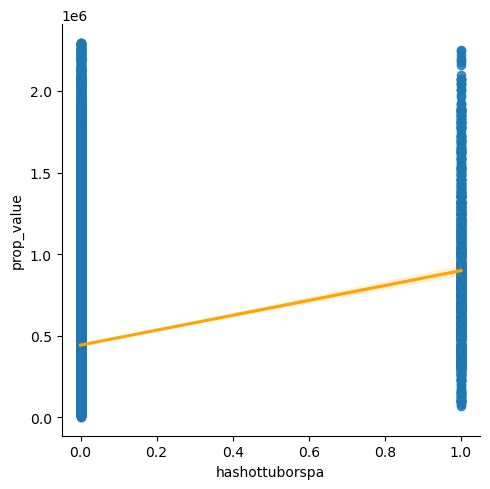

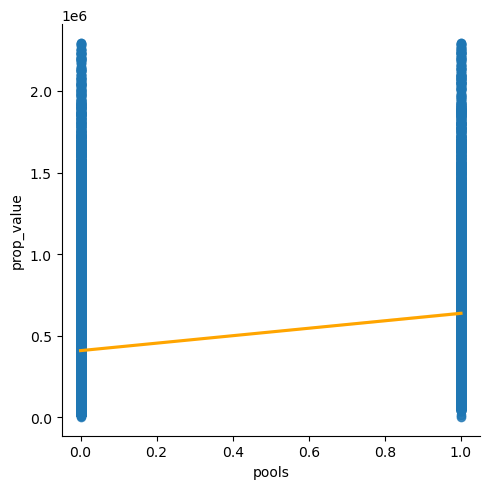

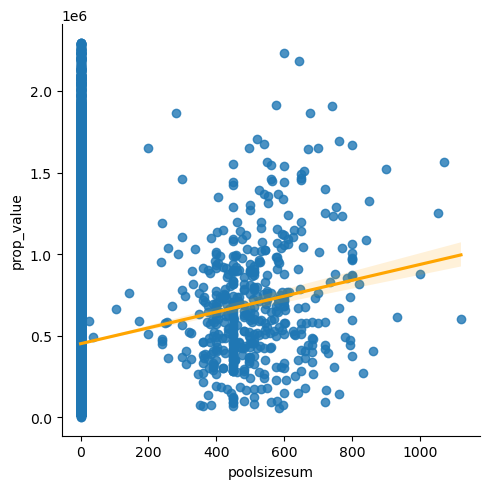

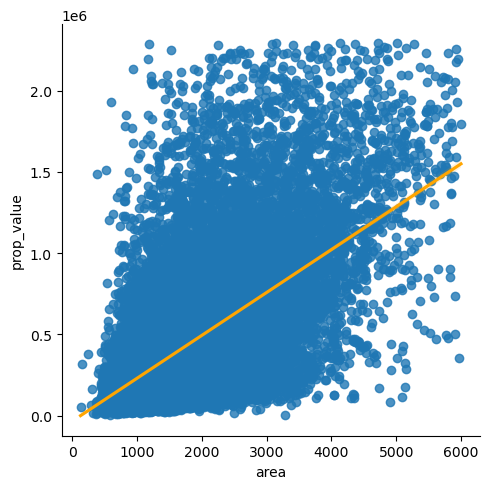

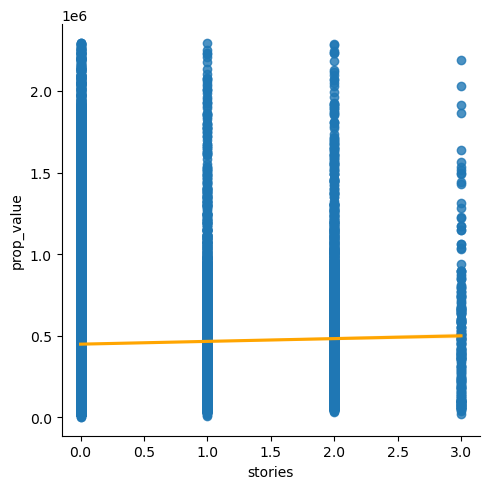

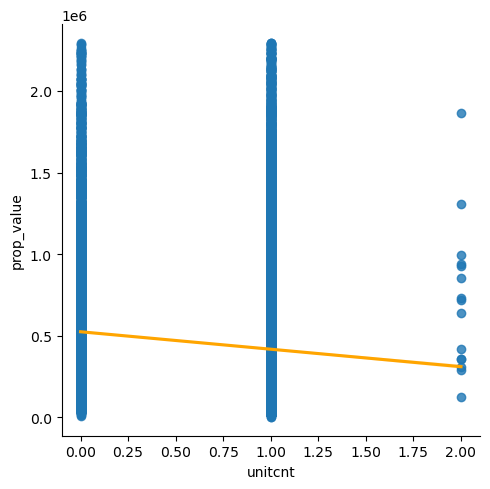

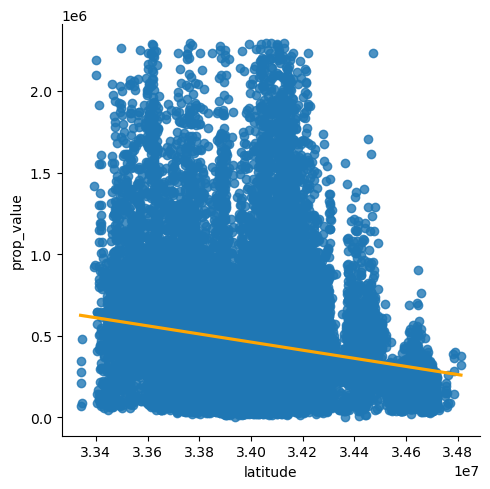

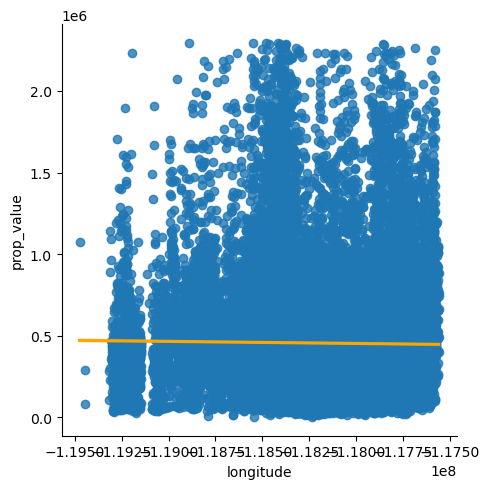

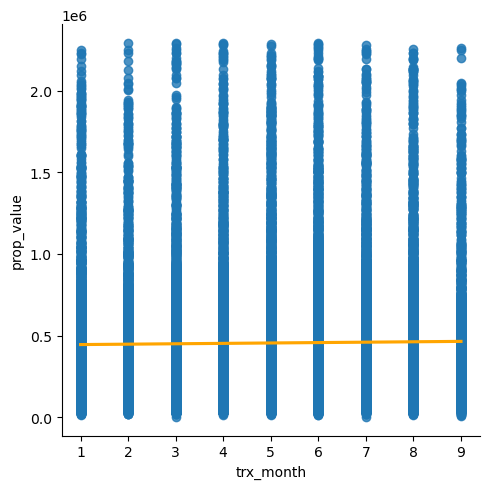

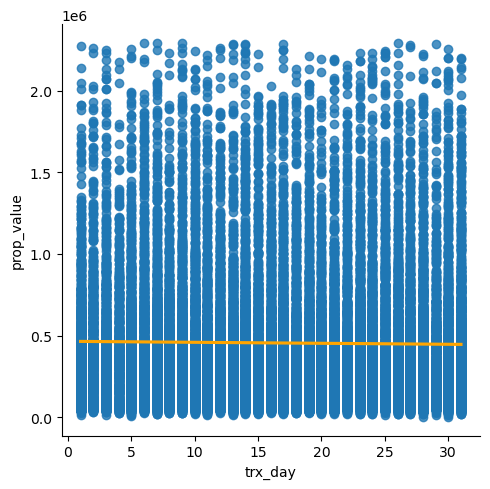

In [10]:
target = 'prop_value'
for i in train.drop(columns=[target,'county']):
    sns.lmplot(x=i,y=target,data=train,line_kws={'color':'orange'})
    # plt.ylim(0,2_000_000)
    plt.show()

In [11]:
def rfe_rev(X,y,f,show_df=False):
    lr = LinearRegression()
    rfe = RFE(lr,n_features_to_select=f)
    rfe.fit(X,y)
    if show_df==True:
        rfe_ranks_df = pd.DataFrame({'Var':X.columns.to_list(),'Rank':rfe.ranking_})
        return rfe_ranks_df.sort_values('Rank')
    else:
        f_mask = rfe.support_
        return X.iloc[:,f_mask].columns.to_list()

In [12]:
train,val,test = w.encode_county(train),w.encode_county(val),w.encode_county(test)
X_train,X_val,X_test = train.drop(columns=['prop_value','county']),val.drop(columns=['prop_value','county']),test.drop(columns=['prop_value','county'])
Xs_train,Xs_val,Xs_test = w.std_zillow(X_train,X_val,X_test)
y_train,y_val,y_test = train[['prop_value']],val[['prop_value']],test[['prop_value']]

In [13]:
df1 = None
for r in range(1,13):
    df = rfe_rev(Xs_train,y_train,r,True)
    df = df.assign(n_features=r)
    df1 = pd.concat([df1,df]) if df1 is not None else df


In [14]:
df1

,Var,Rank,n_features
10,area_s,1,1
13,latitude_s,2,1
14,longitude_s,3,1
2,beds_s,4,1
1,baths_s,5,1
...,...,...,...
0,year_s,4,12
9,poolsizesum_s,5,12
12,unitcnt_s,6,12
16,trx_day_s,7,12


In [15]:
df1.groupby(['Var']).Rank.mean().sort_values()

Var
area_s                1.000000
latitude_s            1.083333
longitude_s           1.250000
beds_s                1.500000
baths_s               1.833333
roomcnt_s             2.250000
Orange_s              2.750000
pools_s               3.333333
stories_s             4.000000
fireplacecnt_s        4.750000
Ventura_s             5.583333
garagetotalsqft_s     6.500000
garagecarcnt_s        7.500000
hashottuborspa_s      8.500000
year_s                9.500000
poolsizesum_s        10.500000
unitcnt_s            11.500000
trx_day_s            12.500000
trx_month_s          13.500000
Name: Rank, dtype: float64

In [60]:
train[['latitude','longitude']] = train[['latitude','longitude']]/1000000

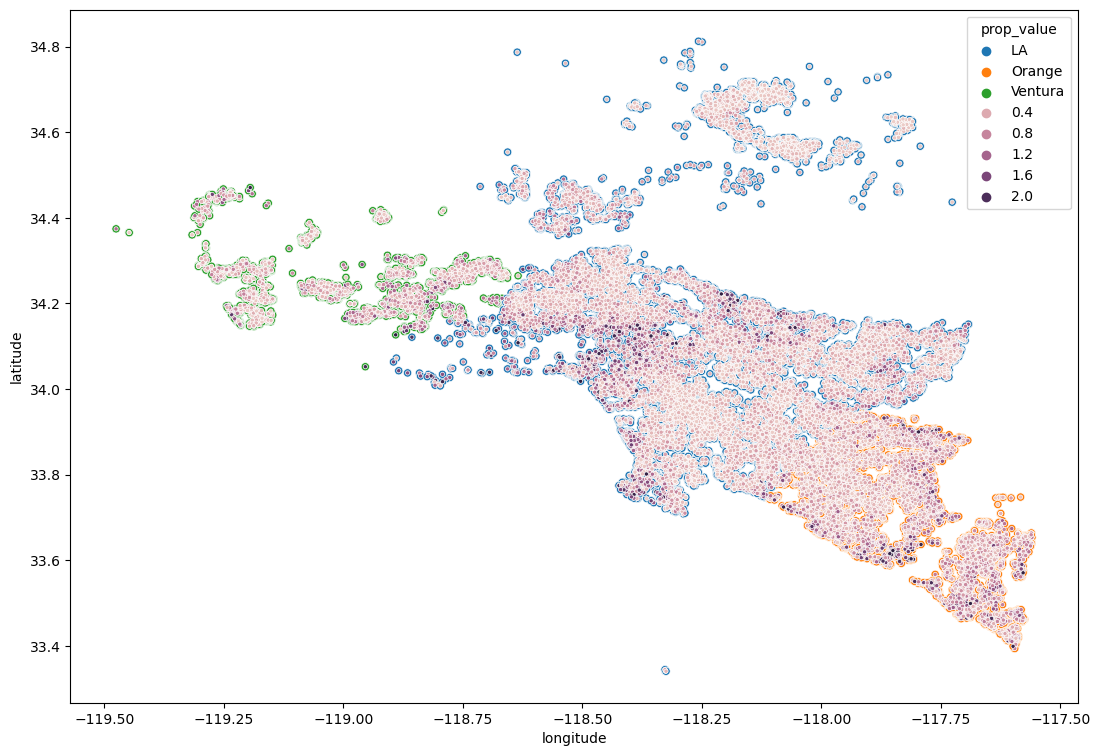

In [74]:
# prop value and county based on lat n long
plt.figure(figsize=[13,9])
sns.scatterplot(data=train,y='latitude',x='longitude',hue='county')
sns.scatterplot(data=train,y='latitude',x='longitude',hue='prop_value',marker='.')
plt.title('')
plt.show()

In [28]:
cols = train.columns.to_list()
spears = []
for col in itertools.permutations(cols,2):
    r,p = stats.spearmanr(train[col[0]], train[col[1]])
    output = {
            'column1':col[0],
            'column2':col[1],
            'r':round(r,6),
            'p':round(p,6)
        }
    spears.append(output)
df2 = pd.DataFrame(spears)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [29]:
df2

,column1,column2,r,p
0,year,baths,0.593825,0.000000
1,year,beds,0.428700,0.000000
2,year,roomcnt,0.247870,0.000000
3,year,fireplacecnt,0.238857,0.000000
4,year,garagecarcnt,0.441965,0.000000
...,...,...,...,...
415,Ventura,longitude,-0.476410,0.000000
416,Ventura,trx_month,-0.001235,0.828870
417,Ventura,trx_day,-0.003965,0.487765
418,Ventura,prop_value,0.065684,0.000000


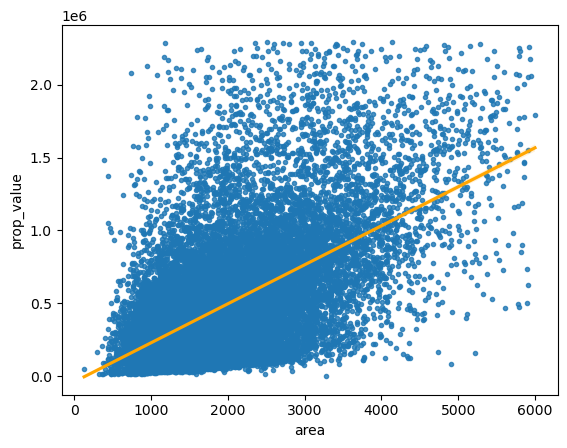

In [15]:
# Does area correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='area',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [16]:
pear(train,'area','prop_value')

Spearman's R: area and prop_value
 r = 0.5004688811806308, p = 0.0


In [17]:
# less than alpha = .05
# yes correlation

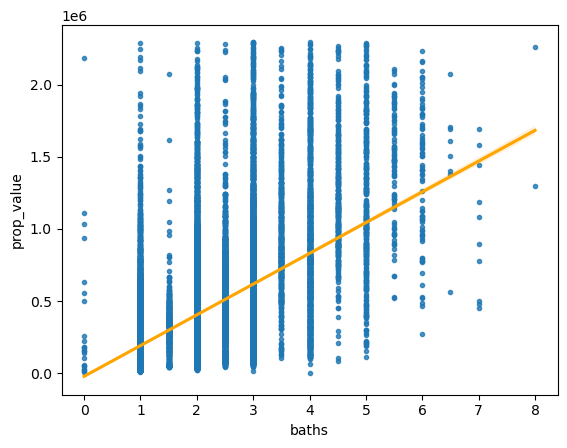

In [18]:
# Does baths correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [19]:
pear(train,'baths','prop_value')

Spearman's R: baths and prop_value
 r = 0.46048030704018234, p = 0.0


In [20]:
# less than alpha = .05
# yes correlation

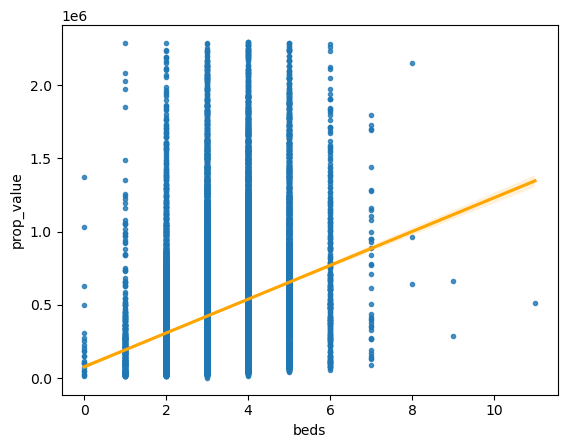

In [21]:
# Does beds correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='beds',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [22]:
pear(train,'beds','prop_value')

Spearman's R: beds and prop_value
 r = 0.27320005753204185, p = 0.0


In [23]:
# less than alpha = .05
# yes correlation

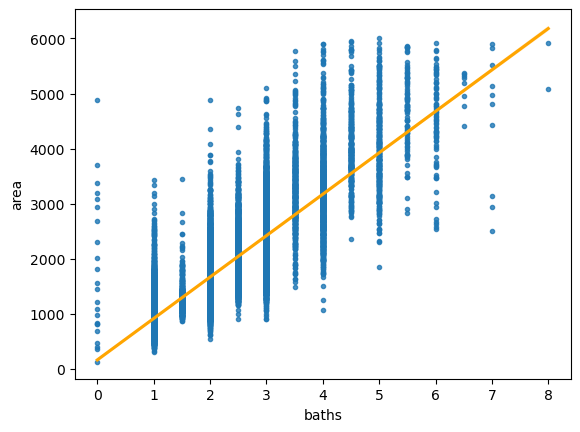

In [24]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='area',marker='.',line_kws={'color':'orange'})
plt.show()

In [25]:
pear(train,'baths','area')

Spearman's R: baths and area
 r = 0.82615211707249, p = 0.0


In [26]:
# less than alpha = .05
# yes correlation

In [27]:
train = train.assign(rooms=(train.beds+train.baths))
val = val.assign(rooms=(val.beds+val.baths))
test = test.assign(rooms=(test.beds+test.baths))

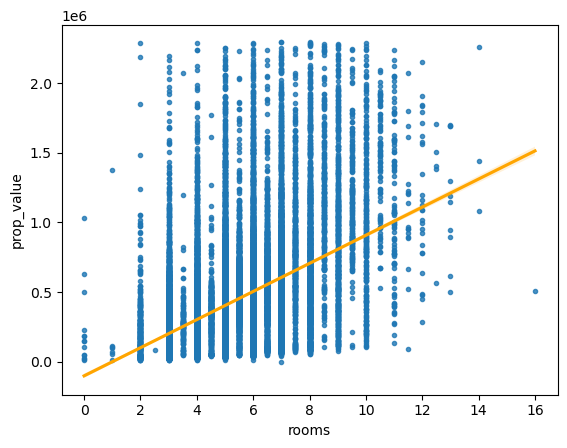

In [28]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='rooms',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [29]:
pear(train,'rooms','prop_value')

Spearman's R: rooms and prop_value
 r = 0.40092132528313257, p = 0.0


In [30]:
# less than alpha = .05
# yes correlation

In [31]:
train.prop_value.mean()

454567.7524980016

In [32]:
X_train,X_val,X_test = train.drop(columns=['prop_value']),val.drop(columns=['prop_value']),test.drop(columns=['prop_value'])
Xs_train,Xs_val,Xs_test = w.std_zillow(X_train,X_val,X_test)
y_train,y_val,y_test = train[['prop_value']],val[['prop_value']],test[['prop_value']]

In [33]:
y_train.mean()[0]

454567.7524980016

In [65]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [ ]:
def reg_mods(Xtr,ytr,Xv,yv,features=None,alpha=1,degree=2,power=2):
    '''
    Input X_train,y_train,X_val,y_val, list of features, and alpha, degree, and power
    so that function will run through linear regression, lasso lars,
    polynomial feature regression, and tweedie regressor (glm)
    - diff feature combos
    - diff hyper params
    - output as df
    '''
    if features is None:
        features = Xtr.columns.to_list()
    # baseline as mean
    pred_mean = ytr.mean()[0]
    ytr_p = ytr.assign(pred_mean=pred_mean)
    yv_p = yv.assign(pred_mean=pred_mean)
    rmse_tr = mean_squared_error(ytr,ytr_p.pred_mean)**.5
    rmse_v = mean_squared_error(yv,yv_p.pred_mean)**.5
    r2_tr = r2_score(ytr, ytr_p.pred_mean)
    r2_v = r2_score(yv, yv_p.pred_mean)
    output = {
            'model':'bl_mean',
            'features':'None',
            'params':'None',
            'rmse_tr':rmse_tr,
            'rmse_v':rmse_v,
            'r2_tr':r2_tr,
            'r2_v':r2_v
        }
    metrics = [output]
    # create iterable for feature combos
    for r in range(1,(len(features)+1)):
        # cycle through feature combos for linear reg
        for feature in itertools.combinations(features,r):
            f = list(feature)
            # linear regression
            lr = LinearRegression()
            lr.fit(Xtr[f],ytr)
            # metrics
            pred_lr_tr = lr.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lr_tr)
            pred_lr_v = lr.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lr_v)
            # table-ize
            output ={
                    'model':'LinearRegression',
                    'features':f,
                    'params':'None',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and alphas for lasso lars
        for feature,a in itertools.product(itertools.combinations(features,r),alpha):
            f = list(feature)
            # lasso lars
            ll = LassoLars(alpha=a,normalize=False,random_state=42)
            ll.fit(Xtr[f],ytr)
            # metrics
            pred_ll_tr = ll.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_ll_tr)
            pred_ll_v = ll.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_ll_v)
            # table-ize
            output ={
                    'model':'LassoLars',
                    'features':f,
                    'params':f'alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and degrees for polynomial feature reg
        for feature,d in itertools.product(itertools.combinations(features,r),degree):
            f = list(feature)
            # polynomial feature regression
            pf = PolynomialFeatures(degree=d)
            Xtr_pf = pf.fit_transform(Xtr[f])
            Xv_pf = pf.transform(Xv[f])
            lp = LinearRegression()
            lp.fit(Xtr_pf,ytr)
            # metrics
            pred_lp_tr = lp.predict(Xtr_pf)
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lp_tr)
            pred_lp_v = lp.predict(Xv_pf)
            rmse_v,r2_v = metrics_reg(yv,pred_lp_v)
            # table-ize
            output ={
                    'model':'PolynomialFeature',
                    'features':f,
                    'params':f'degree={d}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos, alphas, and powers for tweedie reg
        for feature,a,p in itertools.product(itertools.combinations(features,r),alpha,power):
            f = list(feature)
            # tweedie regressor glm
            lm = TweedieRegressor(power=p,alpha=a)
            lm.fit(Xtr[f],ytr.prop_value)
            # metrics
            pred_lm_tr = lm.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lm_tr)
            pred_lm_v = lm.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lm_v)
            # table-ize
            output ={
                    'model':'TweedieRegressor',
                    'features':f,
                    'params':f'power={p},alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
    return pd.DataFrame(metrics)

In [57]:
metrics = reg_mods(Xs_train,y_train,Xs_val,y_val,Xs_test,y_test,features=None,alpha=[1,2,3,4,5,6,7,8,9],degree=[2,3,4,5],power=[1,1.25,1.5,1.75,2])
metrics

,model,features,params,rmse_tr,rmse_v,rmse_t,r2_tr,r2_v,r2_t
0,bl_mean,None,None,379233.862195,369939.797674,376175.515380,0.000000,-0.000659,-0.000004
1,LinearRegression,[baths_s],None,326154.936391,323416.502017,325779.378080,0.260337,0.235199,0.249988
2,LinearRegression,[beds_s],None,364586.763478,357926.721894,363593.142967,0.075754,0.063275,0.065774
3,LinearRegression,[area_s],None,308329.095192,308037.651829,307599.471278,0.338980,0.306204,0.331361
4,LinearRegression,[rooms_s],None,341402.311016,337696.720942,341333.784965,0.189564,0.166170,0.176660
...,...,...,...,...,...,...,...,...,...
881,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1,alpha=9",308565.687470,311201.718138,309216.618705,0.337965,0.291878,0.324312
882,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.25,alpha=9",309869.227269,313241.051781,310636.058798,0.332359,0.282567,0.318094
883,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.5,alpha=9",310795.049347,314636.609762,311719.911769,0.328364,0.276160,0.313327
884,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.75,alpha=9",309248.473654,308527.233802,309772.232085,0.335032,0.303997,0.321881


In [35]:
# poly best f=['baths_s', 'beds_s', 'area_s'], degree=2
# lin reg f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
# lasso f=['beds_s', 'area_s', 'rooms_s'], alpha=9
# tweedie f=['beds_s', 'area_s', 'rooms_s'], power=1.75,alpha=4

In [58]:
def train_val_model(model,X_train,y_train,X_val,y_val):
    if model == 'lr':
        # features
        f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
        # model
        lr = LinearRegression()
        lr.fit(X_train[f],y_train)
        # metrics
        pred_lr_tr = lr.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_lr_tr)
        pred_lr_v = lr.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_lr_v)
        print('Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'poly':
        # features
        f=['baths_s', 'beds_s', 'area_s']
        # polynomial feature regression
        pf = PolynomialFeatures(degree=2)
        X_train_pf = pf.fit_transform(X_train[f])
        X_val_pf = pf.transform(X_val[f])
        # model
        pr = LinearRegression()
        pr.fit(X_train_pf,y_train)
        # metrics
        pred_pr_tr = pr.predict(X_train_pf)
        rmse_tr,r2_tr = metrics_reg(y_train,pred_pr_tr)
        pred_pr_v = pr.predict(X_val_pf)
        rmse_v,r2_v = metrics_reg(y_val,pred_pr_v)
        print('Polynomial Features through Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'lasso':
        # features
        f=['beds_s', 'area_s', 'rooms_s']
        # model
        ll = LassoLars(alpha=9,normalize=False)
        ll.fit(X_train[f],y_train)
        # metrics
        pred_ll_tr = ll.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_ll_tr)
        pred_ll_v = ll.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_ll_v)
        print('Lasso Lars')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'tweedie':
        # features
        f=['beds_s', 'area_s', 'rooms_s']
        # model
        tw = TweedieRegressor(power=1.75,alpha=4)
        tw.fit(X_train[f],y_train.prop_value)
        # metrics
        pred_tw_tr = tw.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_tw_tr)
        pred_tw_v = tw.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_tw_v)
        print('Tweedie Regressor')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    else:
        print('Please include model argument: lr, poly, lasso, tweedie')

In [59]:
train_val_model('lr',Xs_train,y_train,Xs_val,y_val)

Linear Regression
Train       RMSE: 303307.8184181683   R2: 0.36033440465779876
Validate    RMSE: 303401.11413067504    R2: 0.32693285488372237


In [60]:
train_val_model('poly',Xs_train,y_train,Xs_val,y_val)

Polynomial Features through Linear Regression
Train       RMSE: 301813.7102606772   R2: 0.36662092641818356
Validate    RMSE: 302724.6175974598    R2: 0.3299309979019407


In [61]:
train_val_model('lasso',Xs_train,y_train,Xs_val,y_val)

Lasso Lars
Train       RMSE: 303286.63753891137   R2: 0.3604237410075064
Validate    RMSE: 303562.21525616787    R2: 0.3262178893984148


In [62]:
train_val_model('tweedie',Xs_train,y_train,Xs_val,y_val)

Tweedie Regressor
Train       RMSE: 308278.30080229905   R2: 0.33919747311303794
Validate    RMSE: 308856.30976509396    R2: 0.3025115739955858


In [63]:
def test_model(X_train,y_train,X_test,y_test):
    # features
    f=['baths_s', 'beds_s', 'area_s']
    # polynomial feature regression
    pf = PolynomialFeatures(degree=2)
    X_train_pf = pf.fit_transform(X_train[f])
    X_test_pf = pf.transform(X_test[f])
    # model
    pr = LinearRegression()
    pr.fit(X_train_pf,y_train)
    # metrics
    pred_pr_t = pr.predict(X_test_pf)
    rmse_t,r2_t = metrics_reg(y_test,pred_pr_t)
    print('Polynomial Features through Linear Regression')
    print(f'Test    RMSE: {rmse_t}    R2: {r2_t}')

In [64]:
test_model(Xs_train,y_train,Xs_test,y_test)

Polynomial Features through Linear Regression
Test    RMSE: 301542.2033212134    R2: 0.3574351623495109
